### Task 1: Data Profiling to Understand Data Quality
**Description**: Use basic statistical methods to profile a dataset and identify potential quality issues.

**Steps**:
1. Load the dataset using pandas in Python.
2. Understand the data by checking its basic statistics.
3. Identify null values.
4. Check unique values for categorical columns.
5. Review outliers using box plots.

🔍 Basic Statistics:
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_tow

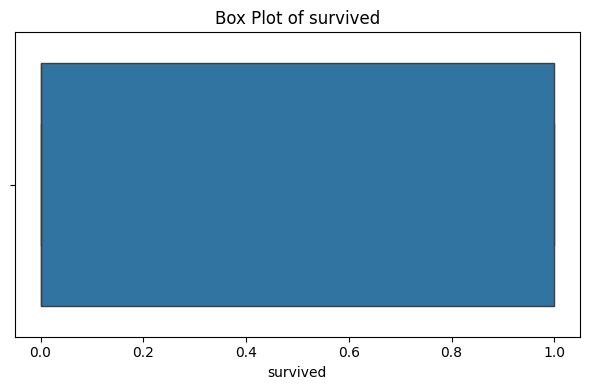

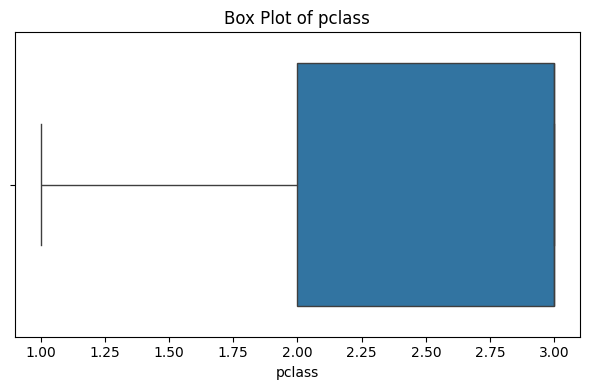

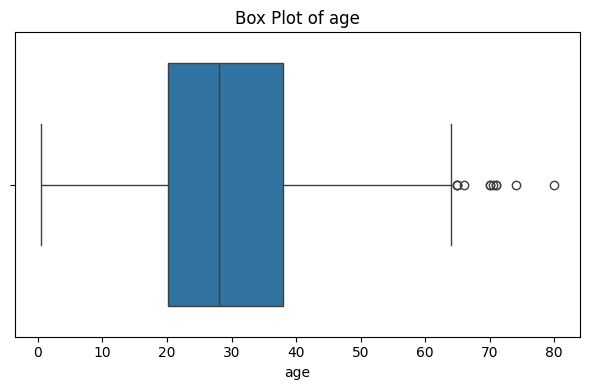

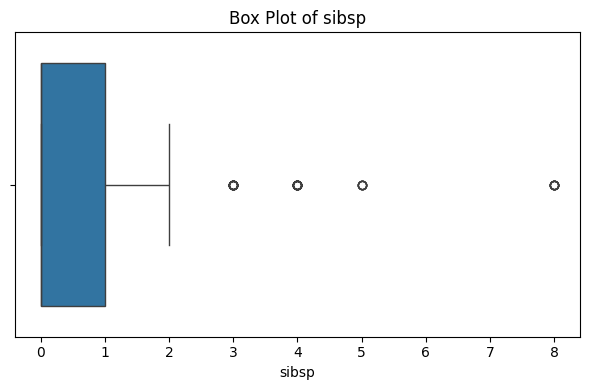

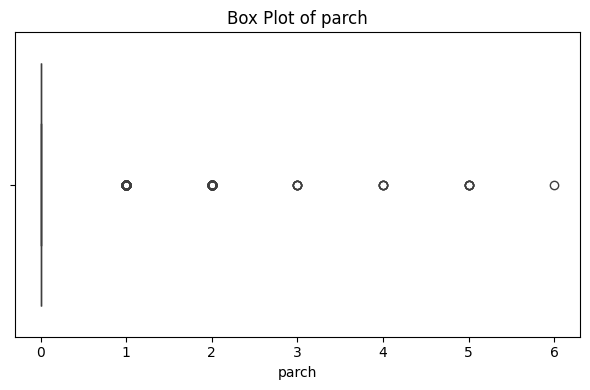

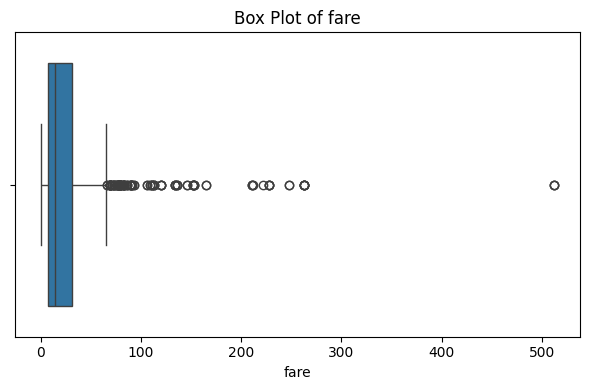

In [4]:
# write your code from here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# For demonstration, we'll use the Titanic dataset
df = sns.load_dataset('titanic')

# Step 2: Basic statistics
print("🔍 Basic Statistics:")
print(df.describe(include='all'))

# Step 3: Identify null values
print("\n❗ Null Values:")
print(df.isnull().sum())

# Step 4: Unique values for categorical columns
print("\n🔢 Unique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Step 5: Review outliers using box plots for numerical columns
print("\n📦 Box Plots for Outlier Detection:")
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()



### Task 2: Implement Simple Data Validation
**Description**: Write a Python script to validate the data types and constraints of each column in a dataset.

**Steps**:
1. Define constraints for each column.
2. Validate each column based on its constraints.

In [5]:
# write your code from here
import pandas as pd

# Step 1: Load dataset (using Titanic dataset for demonstration)
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Step 2: Define constraints
constraints = {
    'PassengerId': {'type': 'int', 'min': 1},
    'Age': {'type': 'float', 'min': 0, 'max': 100},
    'Fare': {'type': 'float', 'min': 0},
    'Pclass': {'type': 'int', 'allowed': [1, 2, 3]},
    'Sex': {'type': 'object', 'allowed': ['male', 'female']},
    'Survived': {'type': 'int', 'allowed': [0, 1]}
}

# Step 3: Validate columns
def validate_column(name, rules):
    if name not in df.columns:
        print(f" Column '{name}' is missing.")
        return

    series = df[name]

    # Check type
    actual_dtype = str(series.dtype)
    expected_type = rules['type']
    if expected_type == 'int' and not pd.api.types.is_integer_dtype(series):
        print(f" {name}: Expected integer but found {actual_dtype}")
    elif expected_type == 'float' and not pd.api.types.is_float_dtype(series):
        print(f" {name}: Expected float but found {actual_dtype}")
    elif expected_type == 'object' and not pd.api.types.is_object_dtype(series):
        print(f" {name}: Expected object/string but found {actual_dtype}")
    
    # Check min/max
    if 'min' in rules:
        if (series < rules['min']).any():
            print(f" {name}: Contains values below minimum {rules['min']}")
    
    if 'max' in rules:
        if (series > rules['max']).any():
            print(f" {name}: Contains values above maximum {rules['max']}")
    
    # Check allowed values
    if 'allowed' in rules:
        invalid_values = ~series.isin(rules['allowed'])
        if invalid_values.any():
            print(f" {name}: Contains values not in allowed set {rules['allowed']}")

# Step 4: Run validations
for column, rule in constraints.items():
    validate_column(column, rule)

print("\n Validation Complete.")




 Validation Complete.


### Task 3: Detect Missing Data Patterns
**Description**: Analyze and visualize missing data patterns in a dataset.

**Steps**:
1. Visualize missing data using a heatmap.
2. Identify patterns in missing data.

In [6]:
# write your code from here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("your_dataset.csv")

# Plot missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

### Task 4: Integrate Automated Data Quality Checks
**Description**: Integrate automated data quality checks using the Great Expectations library for a dataset.

**Steps**:
1. Install and initialize Great Expectations.
2. Set up Great Expectations.
3. Add further checks and validate.

In [ ]:
# write your code from here
# Step 1: Install Great Expectations (Run once in your terminal)
# pip install great_expectations

# Step 2: Import Libraries
import pandas as pd
import great_expectations as ge
from great_expectations.dataset import PandasDataset

# Step 3: Load Your Dataset
df = pd.read_csv("your_dataset.csv")  # Replace with your actual file path

# Step 4: Wrap the DataFrame with Great Expectations
ge_df = ge.dataset.PandasDataset(df)

# Step 5: Add Expectations (Data Quality Checks)

# Example 1: Expect no missing values in a key column
ge_df.expect_column_values_to_not_be_null("column_name_1")

# Example 2: Expect age to be between 0 and 120
ge_df.expect_column_values_to_be_between("age", min_value=0, max_value=120)

# Example 3: Expect a column to only have certain values
ge_df.expect_column_values_to_be_in_set("gender", ["Male", "Female", "Other"])

# Example 4: Expect column to have unique values (e.g., IDs)
ge_df.expect_column_values_to_be_unique("user_id")

# Example 5: Expect column to not be empty
ge_df.expect_column_to_exist("email")

# Step 6: Validate and Get Results
results = ge_df.validate()

# Step 7: Print Validation Summary
import json
print(json.dumps(results, indent=2))

